In [1]:
import seaborn as sns
import pickle
import numpy as np
import csv
import sys
import matplotlib.pyplot as plt
sys.path.extend(['/Users/Wattik 1/Library/Mobile Documents/com~apple~CloudDocs/skola/Thesis', '/Users/Wattik 1/Library/Mobile Documents/com~apple~CloudDocs/skola/Thesis/sources'])

In [ ]:
with open("data/trend_micro_full/url_counts.csv") as file:
    fs = []
    for url, freq in csv.reader(file, delimiter=' '):
        freq = int(freq)
        fs.append(freq)

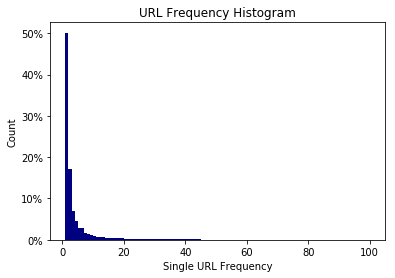

In [162]:
from matplotlib.ticker import PercentFormatter
bins = np.concatenate([
    np.linspace(1, 100, 100),
    # np.logspace(2, 3, 30)
])
sns.distplot(fs, bins=bins, kde=False, norm_hist=True, hist_kws={
    "color": "navy",
    "alpha": 1,
    # "cumulative": True
})

plt.title("URL Frequency Histogram")
plt.xlabel("Single URL Frequency")
plt.ylabel("Count")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.savefig("../text/images/url-frequency-histogram.png", dpi=500)

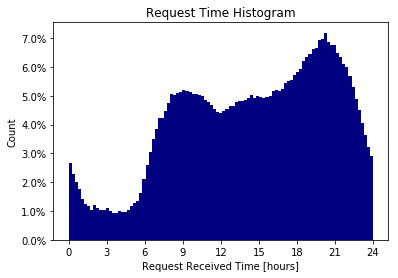

In [155]:
bins = np.linspace(0, 24, 100)
sns.distplot(times, bins=bins, kde=False, norm_hist=True, hist_kws={
    "color": "navy",
    "alpha": 1
})

plt.title("Request Time Histogram")
plt.xlabel("Request Received Time [hours]")
plt.ylabel("Count")
plt.xticks([0, 3, 6, 9, 12, 15, 18, 21, 24])
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.savefig("../text/images/request-time-histogram.png", dpi=500)

In [38]:
with open("data/trend_micro_full/url_scores.csv") as file:
    scores = []
    for url, score in csv.reader(file, delimiter=' '):
        scores.append(float(score))

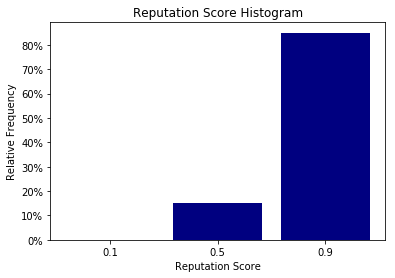

In [96]:
bins = np.linspace(0.0, 1.0, 4)
# sns.distplot(scores, bins=bins, kde=False, hist_kws={
#     "color": "navy",
#     "alpha": 1,
#     "density": False,
# })
hist, _ = np.histogram(scores, bins)
hist = hist / np.sum(hist)
plt.bar([0.1, 0.5, 0.9], hist, color="navy", width=0.33, align="center")

plt.title("Reputation Score Histogram")
plt.xlabel("Reputation Score")
plt.ylabel("Relative Frequency")
plt.xticks([0.1, 0.5, 0.9])
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.savefig("../text/images/score-histogram.png", dpi=500)

In [89]:
hist*100

array([5.37251217e-02, 1.49518093e+01, 8.49944656e+01])

In [70]:
from collections import defaultdict

with open("data/trend_micro_full/user_queries.csv") as file:
    urls = defaultdict(float)
    for time, user, url in csv.reader(file, delimiter=' '):
        urls[user] += 1
        
history_lengths = list(urls.values())

54970
697.0459341458977


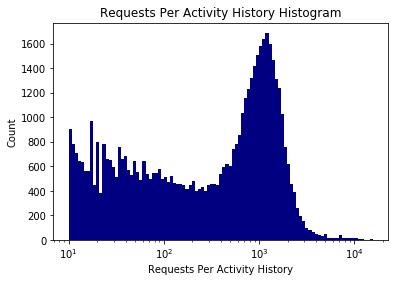

In [167]:
bins = np.logspace(1, 4.2, 100)
sns.distplot(history_lengths, bins=bins, kde=False, norm_hist=False, hist_kws={
    "color": "navy",
    "alpha": 1
})

print(len(history_lengths))
print(np.mean(history_lengths))

plt.xscale("log")
plt.title("Requests Per Activity History Histogram")
plt.xlabel("Requests Per Activity History")
plt.ylabel("Count")
plt.savefig("../text/images/requests-per-activity-histogram.png", dpi=500)
